<a href="https://colab.research.google.com/github/inthyes/ML-Study/blob/main/DeeplearningPytorchTextbook/CNN(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_dataset = torchvision.datasets.FashionMNIST("../chap5/data", download = True,
                                                 transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("../chap05/data", download = True,
                                                 train = False, transform = transforms.Compose([transforms.ToTensor()]))

100%|██████████| 26421880/26421880 [00:01<00:00, 15013924.75it/s]


Extracting ../chap5/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../chap5/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 261729.99it/s]


Extracting ../chap5/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../chap5/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4974734.28it/s]


Extracting ../chap5/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../chap5/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18329606.95it/s]


Extracting ../chap5/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap5/data/FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:01<00:00, 14878285.02it/s]


Extracting ../chap05/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../chap05/data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 288858.38it/s]


Extracting ../chap05/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../chap05/data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4986742.48it/s]


Extracting ../chap05/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../chap05/data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5545012.07it/s]

Extracting ../chap05/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../chap05/data/FashionMNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100)

In [5]:
print(train_loader)

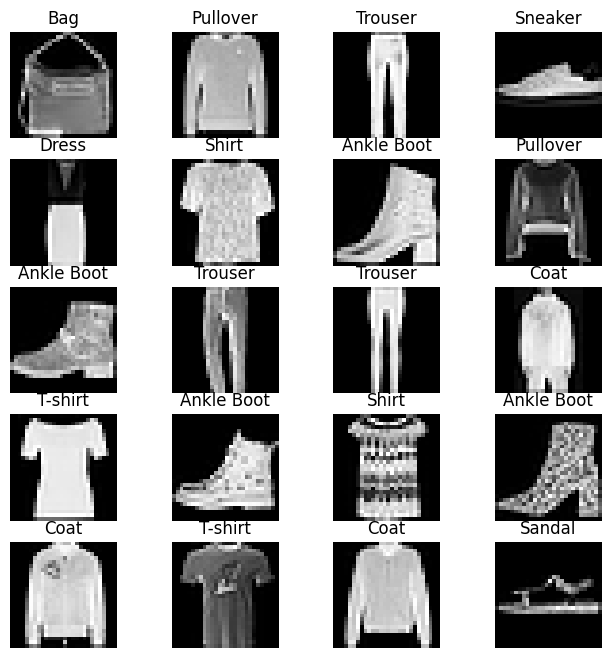

In [6]:
labels_map  = {0: 'T-shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

fig = plt.figure(figsize = (8, 8))
columns = 4;
rows = 5;

for i in range(1, columns * rows + 1):
  img_xy = np.random.randint(len(train_dataset));
  img = train_dataset[img_xy][0][0, : , :]
  fig.add_subplot(rows, columns, i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img, cmap = 'gray')
plt.show()

In [7]:
import numpy as np
examp = np.arange(0, 100, 3)
examp.resize(6, 4)
examp

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45],
       [48, 51, 54, 57],
       [60, 63, 66, 69]])

In [8]:
examp[3]

array([36, 39, 42, 45])

In [9]:
examp[3, 3]

45

In [10]:
examp = np.arange(0, 500, 3)
examp.resize(3, 5, 5)
examp

array([[[  0,   3,   6,   9,  12],
        [ 15,  18,  21,  24,  27],
        [ 30,  33,  36,  39,  42],
        [ 45,  48,  51,  54,  57],
        [ 60,  63,  66,  69,  72]],

       [[ 75,  78,  81,  84,  87],
        [ 90,  93,  96,  99, 102],
        [105, 108, 111, 114, 117],
        [120, 123, 126, 129, 132],
        [135, 138, 141, 144, 147]],

       [[150, 153, 156, 159, 162],
        [165, 168, 171, 174, 177],
        [180, 183, 186, 189, 192],
        [195, 198, 201, 204, 207],
        [210, 213, 216, 219, 222]]])

In [11]:
class FashionDNN(nn.Module):
  def __init__(self):
    super(FashionDNN, self).__init__()
    self.fc1 = nn.Linear(in_features = 784, out_features = 256)
    self.drop = nn.Dropout(0.25)
    self.fc2 = nn.Linear(in_features = 256, out_features = 128)
    self.fc3 = nn.Linear(in_features = 128, out_features = 10)

  def forward(self, input_data):
    out = input_data.view(-1, 784)
    out = F.relu(self.fc1(out))
    out = self.drop(out)
    out = F.relu(self.fc2(out))
    out = self.fc3(out)
    return out

In [12]:
def add(num1, num2):
  result = num1 + num2
  return result

print(add(1, 2))
print(add(2, 3))


3
5


In [13]:
class Calc:
  def __init__(self):
    self.result =0

  def add(self, num1, num2):
    self.result = num1 + num2
    return self.result

obj1 = Calc()
obj2 = Calc()

print(obj1.add(1, 2))
print(obj1.add(2, 3))

print('-----------')

print(obj2.add(2, 2))
print(obj2.add(2, 3))


3
5
-----------
4
5


In [14]:
inputs = torch.randn(64, 3, 244, 244)
# 세 개의 채널이 입력되어 64개의 채널이 출력되기 위한 연산으로 3 * 3크기의 커널을 사용
conv = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 3, padding =1)
outputs = conv(inputs)
layer = nn.Conv2d(1, 1, 3)

In [15]:
import torch.nn.functional as F

inputs = torch.randn(64, 3, 244, 244)
weight = torch.randn(64, 3, 3, 3)
bias = torch.randn(64)
outputs = F.conv2d(inputs, weight, bias, padding = 1)

In [16]:
learning_rate = 0.001;
model = FashionDNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate);
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [17]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test = Variable(images.view(100, 1, 28, 28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count % 500):
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.6097905039787292, Accuracy: 83.38999938964844%
Iteration: 1000, Loss: 0.4964350163936615, Accuracy: 84.43000030517578%
Iteration: 1500, Loss: 0.32889989018440247, Accuracy: 84.4000015258789%
Iteration: 2000, Loss: 0.3947562277317047, Accuracy: 85.23999786376953%
Iteration: 2500, Loss: 0.25309258699417114, Accuracy: 85.98999786376953%
Iteration: 3000, Loss: 0.3205532133579254, Accuracy: 87.12999725341797%


In [18]:
class FashionCNN(nn.Module):
  def __init__(self):
    super(FashionCNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.fc1 = nn.Linear(in_features = 64 * 6 * 6, out_features = 600)
    self.drop = nn.Dropout2d(0.25)
    self.fc2 = nn.Linear(in_features = 600, out_features = 120)
    self.fc3 = nn.Linear(in_features = 120, out_features = 10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1)
    out = self.fc1(out)
    out = self.drop(out)
    out = self.fc2(out)
    out = self.fc3(out)
    return out

In [19]:
# 합성곱 네트워크를 위한 파라미터 정의
learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [20]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100, 1, 28, 28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    count += 1

    if not (count % 50):
      total = 0
      correct = 0
      for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test = Variable(images.view(100, 1, 28, 28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct +=( predictions == labels).sum()
        total += len(labels)

      accuracy = correct * 100 / total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)

    if not (count % 500):
      print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.4592095911502838, Accuracy: 87.50999450683594%
Iteration: 1000, Loss: 0.35766521096229553, Accuracy: 87.25%
Iteration: 1500, Loss: 0.32097312808036804, Accuracy: 87.87999725341797%
Iteration: 2000, Loss: 0.1884293407201767, Accuracy: 89.13999938964844%
Iteration: 2500, Loss: 0.14577308297157288, Accuracy: 89.54000091552734%
Iteration: 3000, Loss: 0.17039906978607178, Accuracy: 89.65999603271484%


In [21]:
pip install opencv-python

In [7]:
pip install mxnet-mkl==1.6.0 numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.1 which is incompatible.


In [1]:
import os
import time
import copy
import glob
import cv2
import shutil
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [2]:
data_path = '/content/drive/MyDrive/080289-main/chap05/data/catanddog/train'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd

'/content'

In [4]:
transform = transforms.Compose(
    [
        transforms.Resize([256, 256]),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]
)

train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 32,
    num_workers = 8,
    shuffle = True
)

print(len(train_dataset))

385


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [28]:
pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


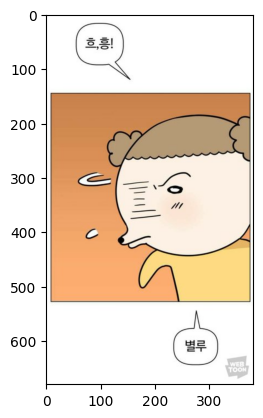

In [6]:
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet.gluon.data.vision import transforms

example_image = mx.image.imread("/content/drive/MyDrive/080289-main/chap05/data/maru.jpg")
plt.imshow(example_image.asnumpy())

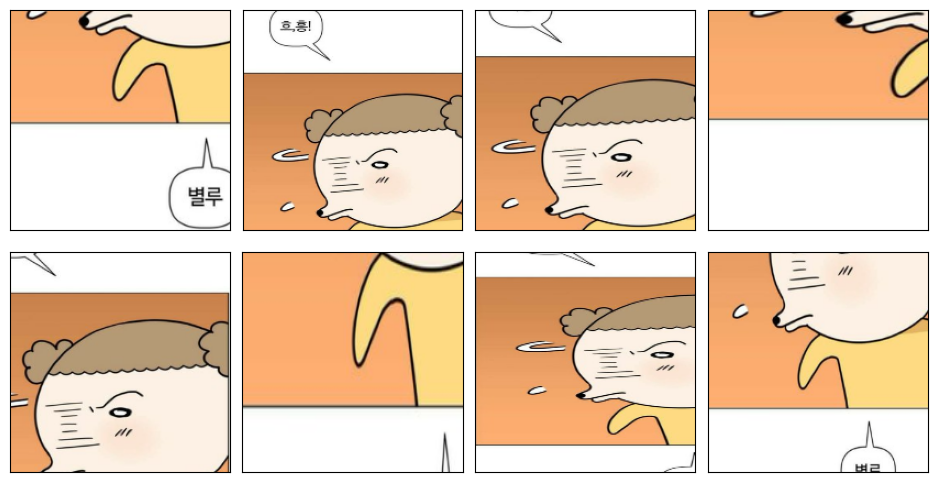

In [7]:
def show_images(imgs, num_rows, num_cols, scale = 2):
  aspect_ratio = imgs[0].shape[0]/imgs[0].shape[1]
  figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
  _, axes = plt.subplots(num_rows, num_cols, figsize = figsize)
  for i in range(num_rows):
    for j in range(num_cols):
      axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
      axes[i][j].axes.get_xaxis().set_visible(False)
      axes[i][j].axes.get_yaxis().set_visible(False)

  plt.subplots_adjust(hspace = 0.1, wspace = 0)
  return axes

def apply(img, aug, num_rows = 2, num_cols = 4, scale = 3):
  Y = [aug(img) for _ in range(num_rows * num_cols)]
  show_images(Y, num_rows, num_cols, scale)

shape_aug = transforms.RandomResizedCrop(size = (200, 200),
                                        scale = (0.1, 1),
                                        ratio = (0.5, 2))
apply(example_image, shape_aug)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


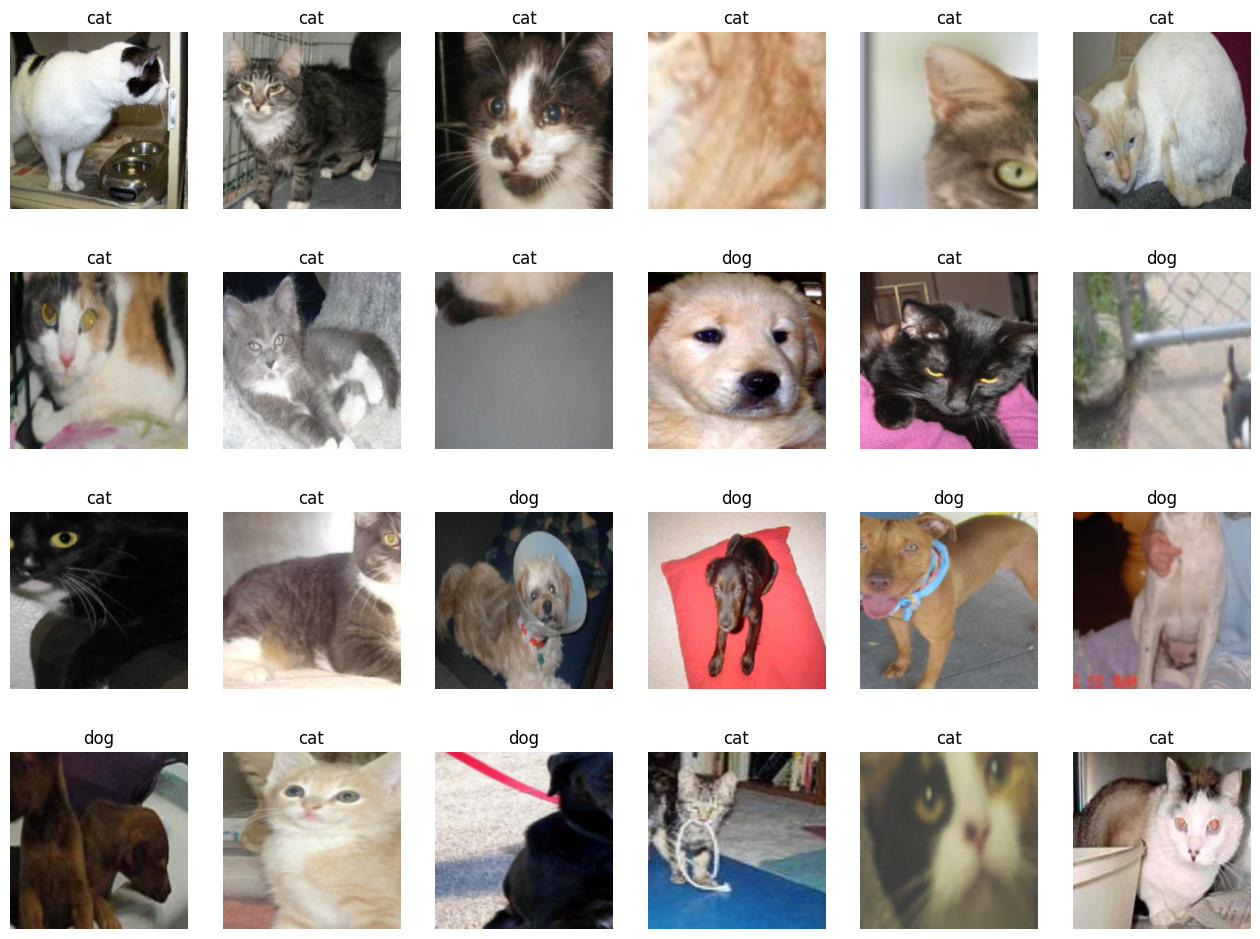

In [8]:
import numpy as np

samples, labels = next(iter(train_loader))
classes = {0: 'cat', 1: 'dog'}
fig = plt.figure(figsize = (16, 24))
for i in range(24):
  a = fig.add_subplot(4, 6, i+1)
  a.set_title(classes[labels[i].item()])
  a.axis('off')
  a.imshow(np.transpose(samples[i].numpy(), (1, 2, 0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace = 0)

In [9]:
resnet18 = models.resnet18(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


In [10]:
def set_parameter_requires_grad(model, feature_extracting = True):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False

set_parameter_requires_grad(resnet18)

In [11]:
resnet18.fc = nn.Linear(512, 2)

In [12]:
for name, param in resnet18.named_parameters():
  if param.requires_grad:
    print(name, param.data)

fc.weight tensor([[ 0.0218,  0.0032, -0.0180,  ..., -0.0288,  0.0092, -0.0102],
        [-0.0115,  0.0287,  0.0394,  ..., -0.0354, -0.0088, -0.0422]])
fc.bias tensor([-0.0358, -0.0002])


In [13]:
model = models.resnet18(pretrained = True)

for param in model.parameters():
  param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():
  param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
# def train_model(model, dataloaders, criterion, optimizer, device, num_epochs = 13, is_train = True):
#   since = time.time()
#   acc_history = []
#   loss_history = []
#   best_acc = 0.0

#   for epoch in range(num_epochs):
#     print('Epoch {}/{}'.format(epoch, num_epochs - 1))
#     print('-' * 10)

#     running_loss = 0.0
#     running_corrects = 0

#     for inputs, labels in dataloaders:
#       inputs = inputs.to(device)
#       labels = labels.to(device)

#       model.to(device)
#       optimizer.zero_grad()
#       outputs = model(inputs)
#       loss = criterion(outputs, labels)
#       _, preds = torch.max(outputs, 1)
#       loss.backward()
#       optimizer.step()

#       running_loss += loss.item() * inputs.size(0)
#       running_corrects += torch.sum(preds == labels.data)

#     epoch_loss = running_loss / len(dataloaders.dataset)
#     epoch_acc = running_corrects.double() / len(dataloaders.dataset)

#     print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

#     if epoch_acc > best_acc:
#       best_acc = epoch_acc

#     acc_history.append(epoch_acc.item())
#     loss_history.append(epoch_loss)
#     torch.save(model.state_dict(), os.path.join('/content/drive/MyDrive/080289-main/chap05/data/catanddog', '{0:0=2d}.pth'.format(epoch)))
#     print()
#     time_elapsed = time.time() - since
#     print("Training complete in {:.0f}m {:.0f}s".format(time_elapsed//60, time_elapsed % 60))
#     print("Best Acc: {:4f}".format(best_acc))
#     return acc_history, loss_history


def train_model(model, dataloaders, criterion, optimizer, device, num_epochs = 13, is_train = True):
    since = time.time()
    acc_history = []
    loss_history = []
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)

            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        torch.save(model.state_dict(), os.path.join('/content/drive/MyDrive/080289-main/chap05/data/catanddog', '{0:0=2d}.pth'.format(epoch)))
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    return acc_history, loss_history

In [41]:
params_to_update = []
for name, param in resnet18.named_parameters():
  if param.requires_grad == True:
    params_to_update.append(param)
    print("\t", name)

optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Loss: 0.4063 Acc: 0.8052

Epoch 1/12
----------
Loss: 0.2943 Acc: 0.9117

Epoch 2/12
----------
Loss: 0.2763 Acc: 0.8935

Epoch 3/12
----------
Loss: 0.2474 Acc: 0.9091

Epoch 4/12
----------
Loss: 0.2152 Acc: 0.9169

Epoch 5/12
----------
Loss: 0.2022 Acc: 0.9247

Epoch 6/12
----------
Loss: 0.2079 Acc: 0.9299

Epoch 7/12
----------
Loss: 0.1817 Acc: 0.9325

Epoch 8/12
----------
Loss: 0.1784 Acc: 0.9403

Epoch 9/12
----------
Loss: 0.1712 Acc: 0.9455

Epoch 10/12
----------
Loss: 0.1873 Acc: 0.9221

Epoch 11/12
----------
Loss: 0.2262 Acc: 0.8987

Epoch 12/12
----------
Loss: 0.1606 Acc: 0.9532

Training complete in 6m 3s
Best Acc: 0.953247


In [77]:
test_path = '/content/drive/MyDrive/080289-main/chap05/data/catanddog/test'

transform = transforms.Compose(
                [
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

98


In [80]:
def eval_model(model, dataloaders, device):
    since = time.time()
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('/content/drive/MyDrive/080289-main/chap05/data/catanddog/' + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)

            _, preds = torch.max(outputs.data, 1)
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.eq(labels).int().sum()

        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        print('Acc: {:.4f}'.format(epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))

    return acc_history

In [81]:
#val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['/content/drive/MyDrive/080289-main/chap05/data/catanddog/00.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/01.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/02.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/03.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/04.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/05.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/06.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/07.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/08.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/09.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/10.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/11.pth', '/content/drive/MyDrive/080289-main/chap05/data/catanddog/12.pth']
Loading model /content/drive/MyDrive/080289-main/chap05/data/catanddog/00.pth


ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 231, in __getitem__
    sample = self.transform(sample)
  File "/usr/local/lib/python3.10/dist-packages/mxnet/gluon/block.py", line 693, in __call__
    out = self.forward(*args)
  File "/usr/local/lib/python3.10/dist-packages/mxnet/gluon/nn/basic_layers.py", line 55, in forward
    x = block(x)
  File "/usr/local/lib/python3.10/dist-packages/mxnet/gluon/block.py", line 693, in __call__
    out = self.forward(*args)
  File "/usr/local/lib/python3.10/dist-packages/mxnet/gluon/block.py", line 1136, in forward
    raise ValueError('In HybridBlock, there must be one NDArray or one Symbol in the input.'
ValueError: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.



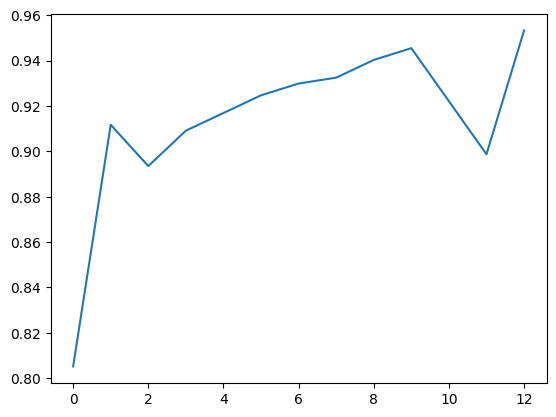

In [82]:
plt.plot(train_acc_hist)

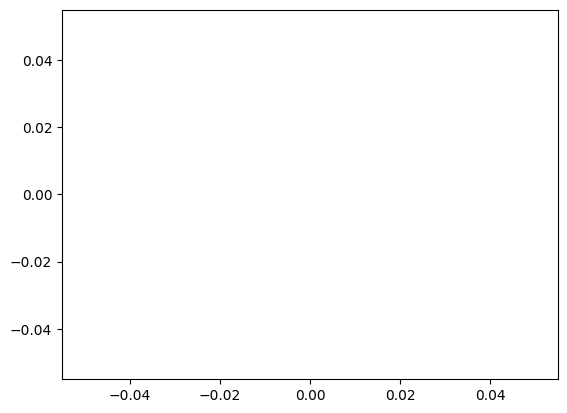

In [83]:
plt.plot(val_acc_hist)

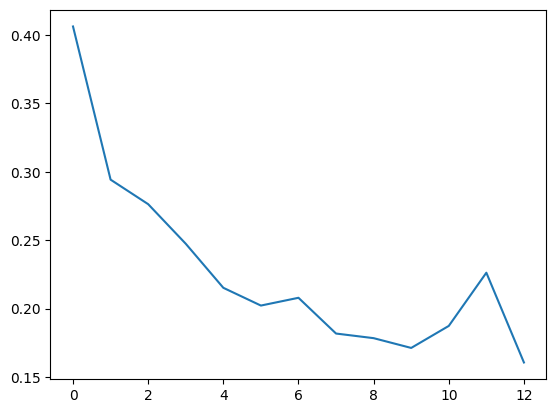

In [84]:
plt.plot(train_loss_hist)